<a href="https://colab.research.google.com/github/chitra-psg/lending-club/blob/master/customer_loan_profile_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required modules
import pandas as pd
import seaborn as sns
import warnings


import matplotlib.pyplot as plt

In [2]:
# Configurations
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('darkgrid')
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# The dataset has many columns and the list is getting truncated in the output. Hence, adjusting the configuration
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [ ]:
# Load the source data from GitHub into dataframe for analysis
# Load all column data in and then determine data type : low_memory=False
df_loan = pd.read_csv("https://github.com/chitra-psg/lending-club/blob/master/data/loan.csv?raw=True", low_memory=False)
df_loan.head()

# Data Cleansing

Data has too many columns. We will shortlist columns based on the data availability in the columns and then perform analysis of the data to shortlist attributes further for our analysis

In [ ]:
# Check if the columns have right data type to decide if any conversion required
df_loan.dtypes

In [5]:
# Identify key columns for our analysis by identifying columns which dont have much useful data. 
# Columns which fall under below category can be excluded from our analysis
# Case 1 : Handle columns with too many missing values
# Case 2 : Check if any column has redudant information by analysing the data
# Case 3 : Check for distribution of the values in each column to understand the usefulness of the columnn

In [ ]:
# Case 1 : Analyse missing values in all columns

# Calcualte missing values percentage for all columns
missing_value = round((df_loan.isnull().sum()/len(df_loan.index)) * 100, 1)

print('No. of columns  = ', missing_value.count())
print('No. of columns with missing values = ', missing_value[missing_value > 0].count())
print('No. of columns with more than 50% missing values = ', missing_value[missing_value > 50].count())

# Drop columns with more than 50% data missing
df_loan.drop(missing_value[ missing_value > 50 ].index, axis=1, inplace=True)

print('No. of columns after drop = ', len(df_loan.columns))

In [ ]:
# Check the numeric data to see how how the data is distributed
# It still has too many numeric fields so will revisit
df_loan.describe()

In [9]:
# Case 3 : Check distinct values apart from Null in all columns

distinct_value = df_loan.nunique()
print('No. of columns  = ', distinct_value.count())
print('No. of columns with only one non NULL value = ', distinct_value[distinct_value ==1].count())

# Drop columns with just 1 non null value
df_loan.drop(distinct_value[ distinct_value == 1 ].index, axis=1, inplace=True)
print('No. of columns after drop = ', len(df_loan.columns))

No. of columns  =  54
No. of columns with only one non NULL value =  9
No. of columns after drop =  45


In [ ]:
df_loan.shape()

In [11]:
#Remove columns that are redundant or not useful for the use case we are analysing
ls_columns_to_be_dropped = ['id','member_id', 'desc', 'url', 'zip_code', 'title', 'delinq_2yrs', 'earliest_cr_line', 'loan_amnt',
                            'inq_last_6mths', 'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp', 'funded_amnt',
                            'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

df_loan.drop(ls_columns_to_be_dropped, axis=1, inplace=True)

In [ ]:
df_loan.shape()

In [13]:
# Loan status Current is still in progressed so will exclude
df_closed_loan = df_loan[df_loan['loan_status'] != 'Current']

In [ ]:
df_closed_loan.shape()

In [ ]:
# issue_d data is available in MMM-YY format
df_closed_loan['issue_month'] = pd.to_datetime(df_closed_loan['issue_d'], format='%b-%y').dt.month
df_closed_loan['issue_year'] = pd.to_datetime(df_closed_loan['issue_d'], format='%b-%y').dt.year

#Standardizing values in the below columns by removing non numeric characters
df_closed_loan['int_rate'] = df_closed_loan['int_rate'].str.extract('(\d+)', expand=False)
df_closed_loan['term'] = df_closed_loan['term'].str.extract('(\d+)', expand=False)
df_closed_loan['emp_length'] = df_closed_loan['emp_length'].str.extract('(\d+)', expand=False)  

In [ ]:
df_closed_loan.head()

**Identifying Outliers**



In [ ]:
df_closed_loan.describe()

In [ ]:
sns.boxplot( y="annual_inc",
            data=df_closed_loan)

In [19]:
p_25  = df_closed_loan.annual_inc.quantile(0.25)
p_90  = df_closed_loan.annual_inc.quantile(0.90)
df_normalised_loan = df_closed_loan[~(df_closed_loan['annual_inc'] >= p_90 ) ]

In [ ]:

sns.boxplot( y="annual_inc",
            data=df_normalised_loan)

# **Analysis**

***Univariate Analysis***

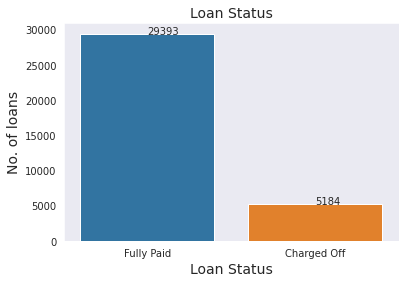

In [33]:
# Univariate Analysis on Loan Status
chrt = sns.countplot(x="loan_status",data=df_normalised_loan)
chrt.set_title('Loan Status',fontsize=14)
chrt.set_xlabel('Loan Status',fontsize=14)
chrt.set_ylabel('No. of loans',fontsize=14) 

# To show count of values above bars
df_cnt = df_normalised_loan['loan_status'].value_counts()
for i, v in df_cnt.reset_index().iterrows():
    chrt.text(i, v.loan_status + 0.3 , v.loan_status)

# Observation
# 14.9 % loans were charged off

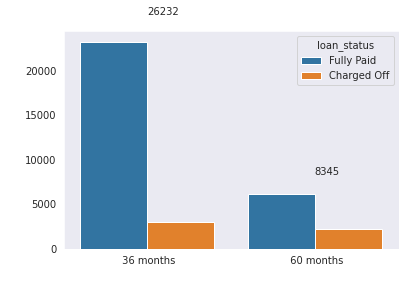

In [59]:
# Univariate Analysis on Terme by Status
chrt = sns.countplot(x="term", data=df_normalised_loan, hue='loan_status' , order = df_normalised_loan['term'].value_counts().index)
chrt.set_title('Purpose Of Loan',fontsize=14,color='w')
chrt.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w')  

# To show count of values above bars
df_cnt = df_normalised_loan['term'].value_counts()
for i, v in df_cnt.reset_index().iterrows():
    chrt.text(i, v.term + 0.3 , v.term)

plt.show()

# Obervation
# 76% loans are 36 months term

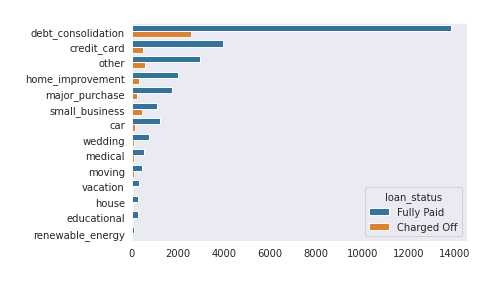

In [50]:
# Univariate Analysis on Loan Purpose by Status
chrt = sns.countplot(y="purpose", data=df_normalised_loan, hue='loan_status' , order = df_normalised_loan['purpose'].value_counts().index)
chrt.set_title('Purpose Of Loan',fontsize=14,color='w')
chrt.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w')      
plt.show()

# Obervation
# Debt Consolidation, Credit Card and Other are the top 3 purpose behind the loans that were charged off.

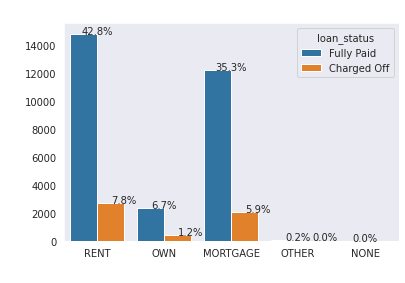

In [45]:
# Univariate Analysis on home ownership by Status
chrt = sns.countplot(x="home_ownership", data=df_normalised_loan, hue='loan_status')
chrt.set_title('Home Ownership',fontsize=14,color='w')
chrt.set_ylabel('Home Ownership',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w') 

total = float(len(df_normalised_loan))
for p in chrt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    chrt.annotate(percentage, (x, y), ha='center')
plt.show()

# Observation
# Applicants who fall under RENT have higher charged off loans [but not very high compared to Mortage].

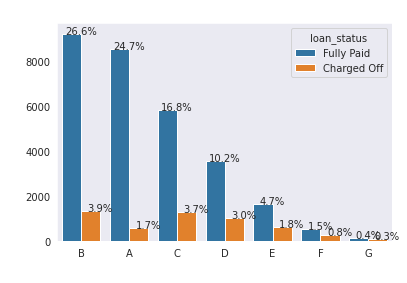

In [48]:
# Univariate Analysis on grade by Status
chrt = sns.countplot(x="grade", data=df_normalised_loan, hue='loan_status', order = df_normalised_loan['grade'].value_counts().index)
chrt.set_title('Loan Grade',fontsize=14,color='w')
chrt.set_ylabel('Loan Grade',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w') 

total = float(len(df_normalised_loan))
for p in chrt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    chrt.annotate(percentage, (x, y), ha='center')
plt.show()

# Observation
# Loans falling under Grade B, C and D have higher charged off

<Figure size 864x576 with 0 Axes>

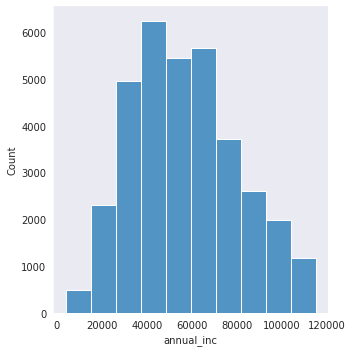

In [53]:
# Univariate Analysis on Annual Income 
plt.figure(figsize= (12,8))
chrt = sns.displot(df_normalised_loan['annual_inc'], bins=10)
plt.show()

In [ ]:
# Univariate Analysis on DTI
plt.figure(figsize= (12,8))
#bar_plot1 = sns.barplot(x='dti', y='loan_status', data=df_normalised_loan, label="Fully Paid", color="red")
#bar_plot2 = sns.barplot(x='dti', y='loan_status', data=df_normalised_loan, label="Charged Off", color="green")
#plt.legend(ncol=2, loc="upper right", frameon=True)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd229b29280> (for post_execute):


KeyboardInterrupt: ignored

<Figure size 864x576 with 0 Axes>

In [22]:
df_loan.to_csv("output.csv") 